<a href="https://colab.research.google.com/github/ishwarvenugopal/ML-DL_Implementation/blob/master/DataAnalysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction to the dataset

In [0]:
import pandas as pd

In [0]:
pd.__version__

'1.0.3'

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
ted=pd.read_csv("/content/drive/My Drive/MSc Dissertation/Tutorials/ted.csv")

In [0]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [0]:
ted.shape

(2550, 17)

In [0]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [0]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2.Which talks provoke the most online discussion?

In [0]:
ted.sort_values('comments').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [0]:
ted['comments_per_view'] = ted.comments/ted.views

In [0]:
ted.sort_values("comments_per_view").tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [0]:
ted["views_per_comment"]=ted.views/ted.comments

In [0]:
ted.sort_values("views_per_comment").head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


# 3.Visualise the distribution of comments

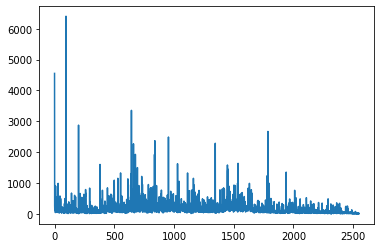

In [0]:
ted.comments.plot()

line plot is normally to denote something over time

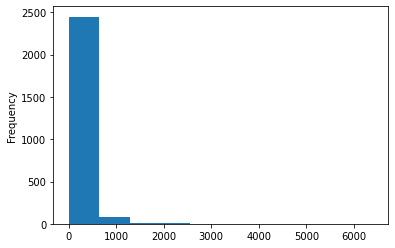

In [0]:
ted.comments.plot(kind='hist')

histogram gives the frequency distribution

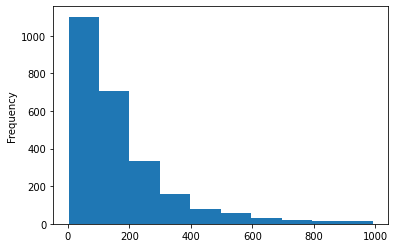

In [0]:
ted[ted.comments<1000].comments.plot(kind='hist')

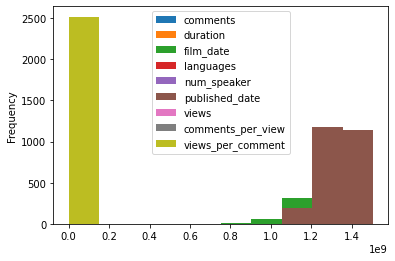

In [0]:
ted.query('comments < 1000').plot(kind='hist')

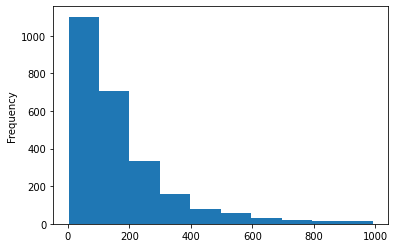

In [0]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist')

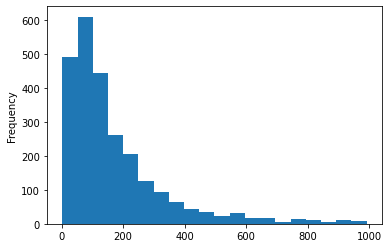

In [0]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='hist', bins=20)

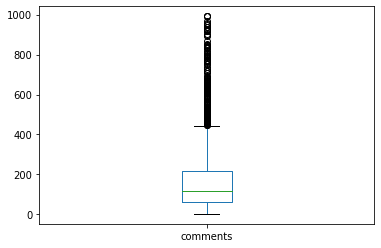

In [0]:
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

# 4. Plot the number of talks that took place each year

In [0]:
ted.event.sample(10)

1567          TEDxTokyo
38              TED2005
636         TEDMED 2009
1415     TEDGlobal 2012
1781          TEDxKyoto
1129    TEDxBloomington
2480             TEDNYC
560      TEDGlobal 2009
2305        TEDMED 2015
1969            TED2015
Name: event, dtype: object

we can see that the event does not always include the year in the name

In [0]:
ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [0]:
pd.to_datetime(ted.film_date)

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [0]:
pd.to_datetime(ted.film_date,unit='s')

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]

In [0]:
ted['film_datetime']=pd.to_datetime(ted.film_date,unit='s')

In [0]:
ted[['event','film_datetime']].sample(5)

,event,film_datetime
1469,TED2013,2013-02-27
2198,TED2016,2016-02-18
1013,TED2011,2011-03-02
316,TED1998,1998-02-02
2035,TED@BCG London,2015-07-01


In [0]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [0]:
ted.film_datetime.dt.year

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: film_datetime, Length: 2550, dtype: int64

In [0]:
ted.event.str.lower()

0            ted2006
1            ted2006
2            ted2006
3            ted2006
4            ted2006
            ...     
2545         ted2017
2546         ted2017
2547         ted2017
2548    tedxmilehigh
2549         ted2017
Name: event, Length: 2550, dtype: object

In [0]:
ted.film_datetime.dt.dayofweek

0       5
1       5
2       4
3       6
4       2
       ..
2545    1
2546    0
2547    0
2548    5
2549    0
Name: film_datetime, Length: 2550, dtype: int64

In [0]:
ted.film_datetime.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_datetime, dtype: int64

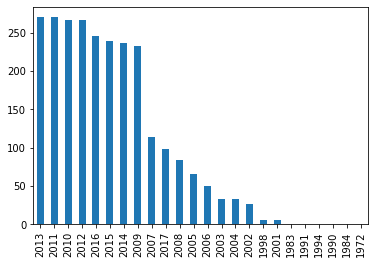

In [0]:
ted.film_datetime.dt.year.value_counts().plot(kind='bar')

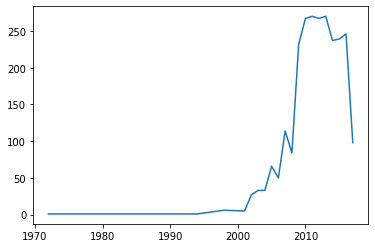

In [0]:
ted.film_datetime.dt.year.value_counts().sort_index().plot()

In [0]:
ted.film_datetime.max()

Timestamp('2017-08-27 00:00:00')

# 5.What were the best events in Ted history to attend?

In [0]:
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [0]:
ted.groupby('event').views.mean().head()

event
AORN Congress                  149818.0
Arbejdsglaede Live             971594.0
BBC TV                         521974.0
Bowery Poetry Club             676741.0
Business Innovation Factory    304086.0
Name: views, dtype: float64

In [0]:
ted.groupby('event').views.mean().sort_values().tail()

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [0]:
ted.groupby('event').views.agg(['count','mean','sum']).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


# 6. Unpack the ratings data

In [0]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [0]:
ted.loc[0,'ratings']

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [0]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [0]:
type(ted.ratings[0])

str

stringified list of dictionaries

In [0]:
import ast #abstract syntax tree

In [0]:
ast.literal_eval('[1,2,3]')

[1, 2, 3]

In [0]:
type(ast.literal_eval('[1,2,3]'))

list

In [0]:
ast.literal_eval(ted.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
def str_to_list(rating_str):
  return ast.literal_eval(rating_str)

In [0]:
str_to_list(ted.ratings[0])

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [0]:
ted.ratings.apply(lambda x:ast.literal_eval(x))

0       [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1       [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2       [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3       [{'id': 3, 'name': 'Courageous', 'count': 760}...
4       [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
                              ...                        
2545    [{'id': 3, 'name': 'Courageous', 'count': 24},...
2546    [{'id': 22, 'name': 'Fascinating', 'count': 32...
2547    [{'id': 1, 'name': 'Beautiful', 'count': 14}, ...
2548    [{'id': 11, 'name': 'Longwinded', 'count': 3},...
2549    [{'id': 21, 'name': 'Unconvincing', 'count': 2...
Name: ratings, Length: 2550, dtype: object

In [0]:
ted['ratings_list'] = ted.ratings.apply(lambda x:ast.literal_eval(x))

In [0]:
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
ratings_list                  object
dtype: object

# 7. Count the total number of ratings received by each talk

And put it in a new column called 'num_ratings'

In [0]:
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

In [0]:
def get_num_ratings(list_of_dicts):
  num =  0
  for d in list_of_dicts:
    num = num + d['count']
  return num

In [0]:
get_num_ratings(ted.ratings_list[0])

93850

In [0]:
ted.ratings_list.apply(get_num_ratings)

0       93850
1        2936
2        2824
3        3728
4       25620
        ...  
2545      192
2546      151
2547      136
2548      583
2549      142
Name: ratings_list, Length: 2550, dtype: int64

In [0]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [0]:
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

# 8. Which occupations delivered the funniest ted talks on average?

## Step 1: Count the number of funny ratings

In [0]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [0]:
ted.ratings.str.contains('Funny')

0       True
1       True
2       True
3       True
4       True
        ... 
2545    True
2546    True
2547    True
2548    True
2549    True
Name: ratings, Length: 2550, dtype: bool

In [0]:
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [0]:
def get_funny_ratings(list_of_dicts):
  for d in list_of_dicts:
    if d['name']=='Funny':
      return d['count']

In [0]:
ted['funny_ratings']=ted.ratings_list.apply(get_funny_ratings)

In [0]:
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [0]:
ted['funny_rate']=ted.funny_ratings/ted.num_ratings

In [0]:
ted.sort_values('funny_rate').speaker_occupation.head(20)

2549               Game designer
1612                   Biologist
612                     Sculptor
998               Penguin expert
593                     Engineer
284               Space activist
1041         Biomedical engineer
1618      Spinal cord researcher
2132    Computational geneticist
442                     Sculptor
426              Author, thinker
458                     Educator
2437      Environmental engineer
1491             Photojournalist
1893     Forensic anthropologist
783             Marine biologist
195                    Kenyan MP
772             HIV/AIDS fighter
788            Building activist
936                Neuroengineer
Name: speaker_occupation, dtype: object

## Step 3: Analyze the funny rate by occupation

In [0]:
ted.groupby('speaker_occupation').funny_rate.mean().sort_values().tail()

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [0]:
ted.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

## Step 4: Focus on occupations that are well-represented in the data

In [0]:
occupation_counts = ted.speaker_occupation.value_counts()

In [0]:
occupation_counts [occupation_counts>=5]

Writer                                        45
Artist                                        34
Designer                                      34
Journalist                                    33
Entrepreneur                                  31
                                              ..
Environmentalist, futurist                     5
Paleontologist                                 5
Chemist                                        5
Physician                                      5
Investor and advocate for moral leadership     5
Name: speaker_occupation, Length: 68, dtype: int64

In [0]:
occupation_counts [occupation_counts>=5].index

Index(['Writer', 'Artist', 'Designer', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Author', 'Educator', 'Neuroscientist', 'Economist', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Marine biologist', 'Musician',
       'Activist', 'Global health expert; data visionary', 'Technologist',
       'Oceanographer', 'Poet', 'Behavioral economist', 'Singer/songwriter',
       'Historian', 'Graphic designer', 'Philanthropist', 'Astronomer',
       'Novelist', 'Futurist', 'Computer scientist', 'Social psychologist',
       'Engineer', 'Astrophysicist', 'Mathematician', 'Evolutionary biologist',
       'Reporter', 'Legal activist', 'Photojournalist', 'Singer-songwriter',
       'Comedian', 'Writer, activist', 'Performance poet, multimedia artist',
       'Social entrepreneur', 'Techno-illusionist', 'Climate advocate',
       'Researcher', 'Data scientist', 'Science writer', 'Tech visionary',
       'Sculptor',

In [0]:
top_occupations = occupation_counts [occupation_counts>=5].index

In [0]:
type(top_occupations)

pandas.core.indexes.base.Index

In [0]:
ted[ted.speaker_occupation.isin(top_occupations)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment,film_datetime,ratings_list,num_ratings,funny_ratings,funny_rate
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544,0.185286
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390,0.054254
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,0.000048,21037.847826,2006-02-23,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",1024,9,0.008789
11,55,Jehane Noujaim unveils her 2006 TED Prize wish...,1538,TED2006,1140912000,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,1,1153786260,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...","[{'id': 2228, 'hero': 'https://pe.tedcdn.com/i...",Filmmaker,"['TED Prize', 'art', 'culture', 'entertainment...",My wish: A global day of film,https://www.ted.com/talks/jehane_noujaim_inspi...,387877,0.000142,7052.309091,2006-02-26,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...",592,5,0.008446
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,1140652800,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,1154391060,"[{'id': 3, 'name': 'Courageous', 'count': 83},...","[{'id': 2043, 'hero': 'https://pe.tedcdn.com/i...",Tech visionary,"['children', 'design', 'education', 'entrepren...",One Laptop per Child,https://www.ted.com/talks/nicholas_negroponte_...,358304,0.000276,3619.232323,2006-02-23,"[{'id': 3, 'name': 'Courageous', 'count': 83},...",781,14,0.017926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,10,"Forget quinoa. Meet fonio, an ancient ""miracle...",934,TED2017,1503792000,2,Pierre Thiam,Pierre Thiam: A forgotten ancient grain that c...,1,1505313942,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 2873, 'hero': 'https://pe.tedcdn.com/i...",Chef,"['Africa', 'agriculture', 'farming', 'food', '...",A forgotten ancient grain that could help Afri...,https://www.ted.com/talks/pierre_thiam_a_forgo...,527314,0.000019,52731.400000,2017-08-27,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...",256,2,0.007812
2541,12,Physics doesn't just happen in a fancy lab -- ...,957,TEDxManchester,1487462400,2,Helen Czerski,Helen Czerski: The fascinating physics of ever...,1,1505419202,"[{'id': 11, 'name': 'Longwinded', 'count': 29}...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Physicist,"['TEDx', 'physics', 'play', 'science']",The fascinating physics of everyday life,https://www.ted.com/talks/helen_czerski_fun_ho...,656791,0.000018,54732.583333,2017-02-19,"[{'id': 11, 'name': 'Longwinded', 'count': 29}...",378,39,0.

In [0]:
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]

In [0]:
ted_top_occupations.shape

(786, 24)

In [0]:
ted_top_occupations.groupby('speaker_occupation').funny_rate.mean().sort_values()

speaker_occupation
Surgeon                                       0.002465
Physician                                     0.004515
Photojournalist                               0.004908
Investor and advocate for moral leadership    0.005198
Photographer                                  0.007152
                                                ...   
Data scientist                                0.184076
Producer                                      0.202531
Singer/songwriter                             0.252205
Performance poet, multimedia artist           0.306468
Comedian                                      0.512457
Name: funny_rate, Length: 68, dtype: float64